In [1]:
from util import *

# change file path here
left_data_path = ['4.15/left_cal.txt', '4.15/left_test.txt']
right_data_path = ['4.27/right_cal.txt', '4.27/right_test.txt']

# set default font size
plt.rcParams.update({'font.size': 15})
color = ['k', 'b', 'r', 'g']
titles = ['x', 'y', 'z']

In [2]:
# left
left_cal_data, left_cal_mat = process_data(left_data_path)
left_test_cal = testCalibration(left_cal_data, left_cal_mat)

# right
right_cal_data, right_cal_mat = process_data(right_data_path)
right_test_cal = testCalibration(right_cal_data, right_cal_mat)

In [3]:
# print errors and matrices
print("Left Sensor Calibration: ")
print_error(left_test_cal, left_cal_data)
# print(f"Calibration matrix: \n{left_cal_mat[0].transpose()}\n")

print("Right Sensor Calibration: ")
print_error(right_test_cal, right_cal_data)
# print(f"Calibration matrix: \n{right_cal_mat[0].transpose()}")

Left Sensor Calibration: 
Errors:
  x: RMSE: 0.0594, NRMSD: 1.6465%, R^2: 0.9933, max error:  0.1792
  y: RMSE: 0.0450, NRMSD: 1.2147%, R^2: 0.9948, max error:  0.1379
  z: RMSE: 0.1456, NRMSD: 2.9363%, R^2: 0.9698, max error:  0.4654

Right Sensor Calibration: 
Errors:
  x: RMSE: 0.0819, NRMSD: 2.1951%, R^2: 0.9841, max error:  0.2235
  y: RMSE: 0.0595, NRMSD: 1.4361%, R^2: 0.9920, max error:  0.1747
  z: RMSE: 0.2135, NRMSD: 3.6974%, R^2: 0.9366, max error:  0.7405



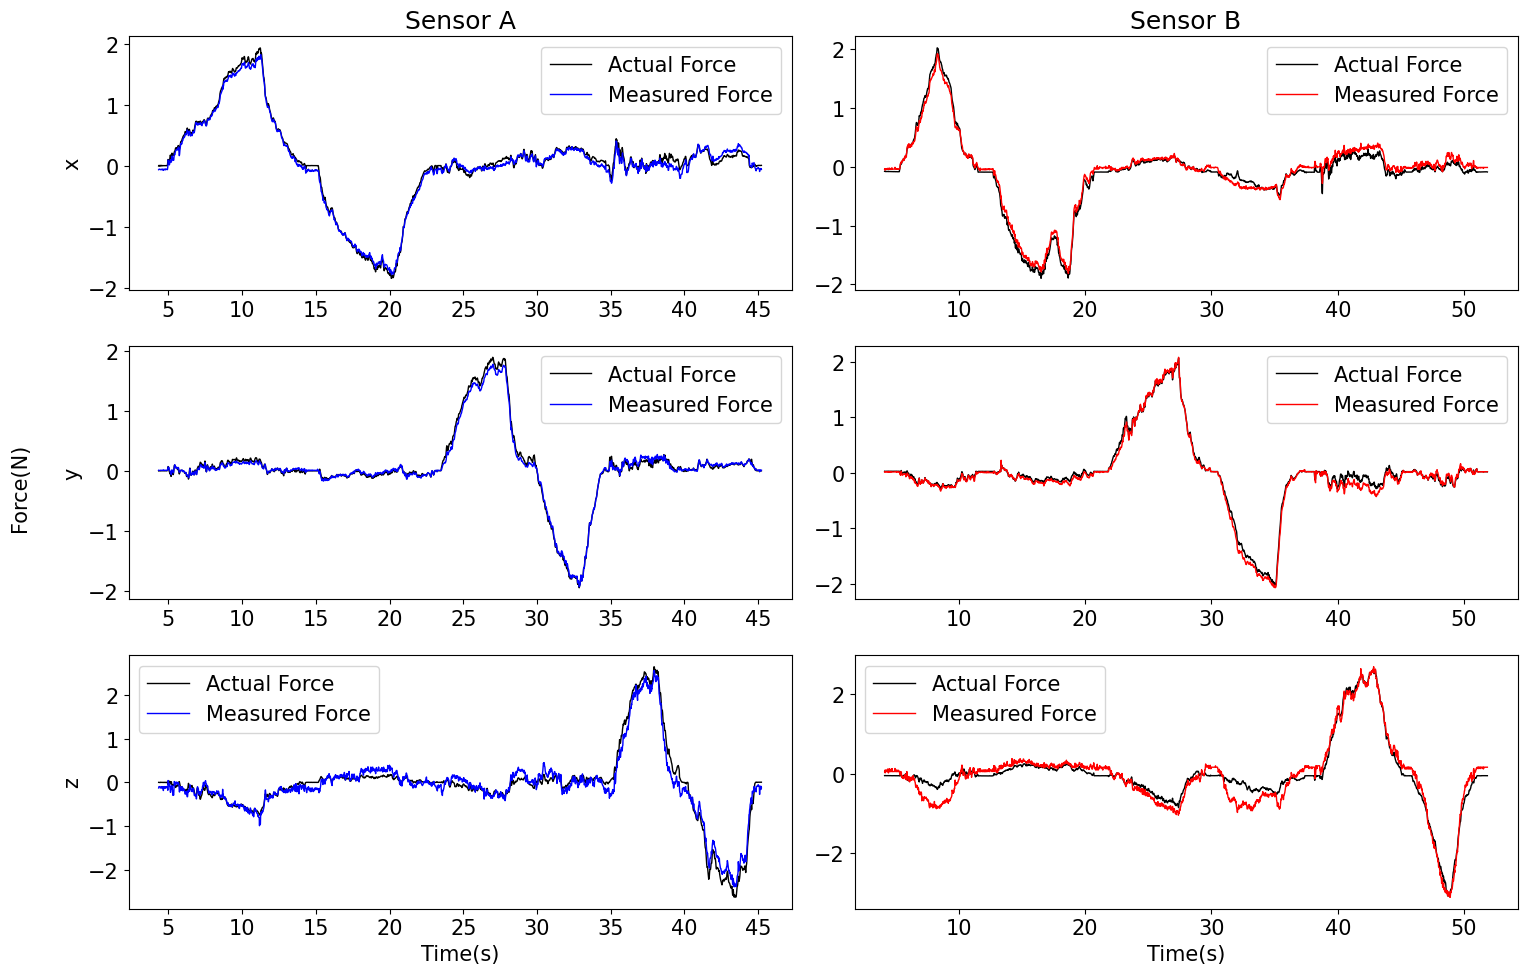

In [4]:
# plot force versus time

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i in range(3):
    ax1 = axes[i, 0]
    ax1.plot(left_cal_data[1].Time, left_cal_data[1].ForceData[:, i], color=color[0], label='Actual Force', linewidth=1)
    ax1.plot(left_cal_data[1].Time, left_test_cal[1][:, i], color=color[1], label='Measured Force', linewidth=1)
    ax1.set_ylabel(titles[i])
    ax1.legend()
    ax2 = axes[i, 1]
    ax2.plot(right_cal_data[1].Time, right_cal_data[1].ForceData[:, i], color=color[0], label='Actual Force', linewidth=1)
    ax2.plot(right_cal_data[1].Time, right_test_cal[1][:, i], color=color[2], label='Measured Force', linewidth=1)
    ax2.legend()
axes[0, 0].set_title('Sensor A')
axes[0, 1].set_title('Sensor B')
axes[2, 0].set_xlabel('Time(s)')
axes[2, 1].set_xlabel('Time(s)')
fig.text(-0.02, 0.5, 'Force(N)', va = 'center', rotation = 'vertical')
plt.tight_layout()
plt.show()

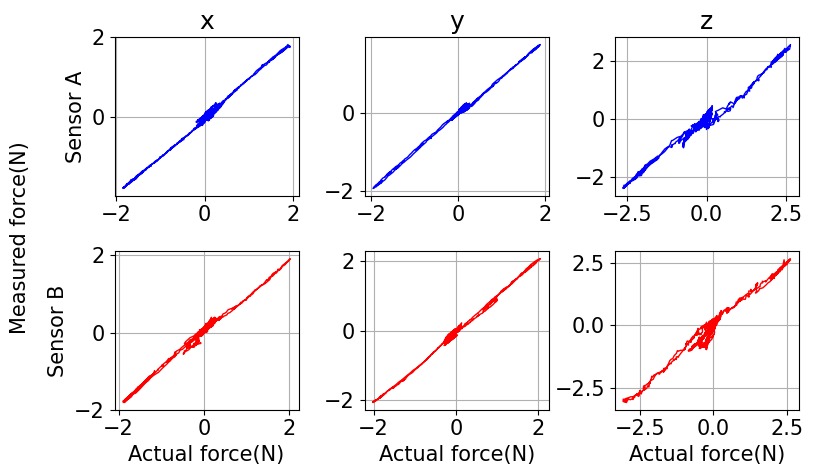

In [5]:
# plot force versus force
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for i in range(3):
    ax1 = axes[0, i]
    ax1.plot(left_cal_data[1].ForceData[:, i], left_test_cal[1][:, i], color=color[1], linewidth=1)
    ax1.set_title(titles[i])
    ax1.grid(True)
    ax2 = axes[1, i]
    ax2.plot(right_cal_data[1].ForceData[:, i], right_test_cal[1][:, i], color=color[2], linewidth=1)
    ax2.set_xlabel('Actual force(N)')
    ax2.grid(True)
axes[0, 0].set_ylabel('Sensor A')
axes[1, 0].set_ylabel('Sensor B')
fig.text(-0.02, 0.5, 'Measured force(N)', va = 'center', rotation = 'vertical')
plt.tight_layout()
plt.show()
